In [3]:
## Import Libraryes

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
## Import Dataset
Data = pd.read_excel('/Users/inazawaelectronics/Desktop/PROJECTS/BIRD STRIKES PROJECT/Bird Strikes data.xlsx')
Data.head(3)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No


In [5]:
### Read The Dataset Columns
Data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [6]:
### Idendify Datatypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [7]:
# See Identify How many rows and columns in Dataset
Data.shape

(25558, 26)

In [8]:
## Find How Many Unique Values in Record ID Column 
len(Data['Record ID'].unique())

25558

In [9]:
#### Drop the Record ID Column in Dataset 
Data.drop('Record ID', axis= 1, inplace= True)

In [10]:
### find how many Duplicated rows in this Dataset
len(Data[Data.duplicated()])

10

In [11]:
### Remove Duplicates
Data.drop_duplicates(inplace= True)

In [12]:
Data.shape

(25548, 25)

In [13]:
### Find the NAN Values Percentages
Data.isnull().mean() * 100

Aircraft: Type                              0.504932
Airport: Name                               0.504932
Altitude bin                                0.504932
Aircraft: Make/Model                        0.000000
Wildlife: Number struck                     0.504932
Wildlife: Number Struck Actual              0.000000
Effect: Impact to flight                    0.504932
FlightDate                                  0.504932
Effect: Indicated Damage                    0.000000
Aircraft: Number of engines?                1.045092
Aircraft: Airline/Operator                  0.504932
Origin State                                1.757476
When: Phase of flight                       0.504932
Conditions: Precipitation                   0.000000
Remains of wildlife collected?              0.000000
Remains of wildlife sent to Smithsonian     0.000000
Remarks                                    18.662909
Wildlife: Size                              0.504932
Conditions: Sky                             0.

<Axes: >

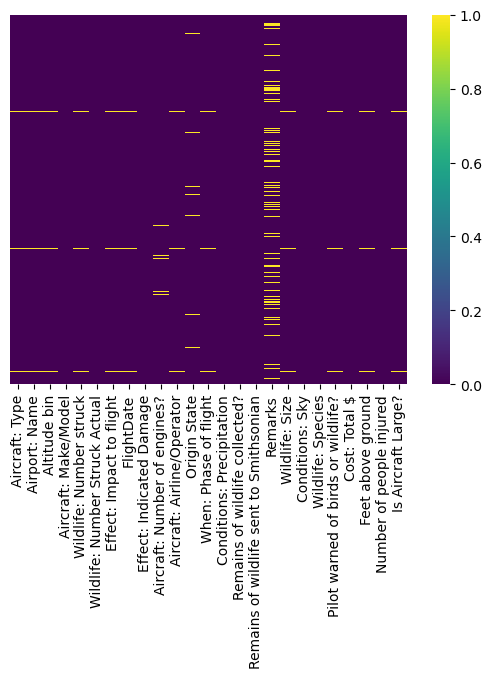

In [14]:
### Find NAN Values Using Heatmap
sns.heatmap(Data.isnull(), cmap= 'viridis', yticklabels= False)

In [15]:
Data['Remarks'].isnull().sum()

4768

In [16]:
len(Data['Remarks'].unique())

18187

In [17]:
Data['Remarks'].value_counts().sort_values(ascending=False).head(10)

NO DMG.                                                           739
NO DMG                                                            395
ATIS WARNING.                                                     165
ATIS WARNING                                                      135
# STRUCK NOT REPTD, ASSUME 1, SAME AS # SEEN.                      72
ATIS WARNING. NO DMG.                                              53
NO DMG REPTD.                                                      49
ID BY SMITHSONIAN.                                                 44
DATA ENTRY NOTE: # STRUCK NOT REPTD, ASSUME 1, SAME AS # SEEN.     43
# STRUCK NOT REPTD, ASSUME 1.                                      42
Name: Remarks, dtype: int64

In [18]:
### Stats Values
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Wildlife: Number Struck Actual,25548.0,2.692187,12.796435,1.0,1.0,1.0,1.0,942.0
Cost: Total $,25548.0,5569.533623,121995.087626,0.0,0.0,0.0,0.0,12397751.0
Feet above ground,25419.0,799.184822,1740.356669,0.0,0.0,50.0,700.0,18000.0
Number of people injured,25548.0,0.001057,0.050430,0.0,0.0,0.0,0.0,6.0


In [19]:
### Put Only Cagegorical Features in One lIst
categorical_features = [feature for feature in Data.columns if Data[feature].dtypes == 'O']
### Put Only Numarical Features in One lIst
numarical_features = [feature for feature in Data.columns if Data[feature].dtypes != 'O']

In [20]:
Data[categorical_features].head(3)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,Engine Shut Down,Caused damage,2,US AIRWAYS*,New York,Climb,None,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,None,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,No
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,None,No damage,2,BUSINESS,Louisiana,Approach,None,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,No


In [21]:
Data[categorical_features].isnull().sum()

Aircraft: Type                         129
Airport: Name                          129
Altitude bin                           129
Aircraft: Make/Model                     0
Wildlife: Number struck                129
Effect: Impact to flight               129
Effect: Indicated Damage                 0
Aircraft: Number of engines?           267
Aircraft: Airline/Operator             129
Origin State                           449
When: Phase of flight                  129
Conditions: Precipitation                0
Remarks                               4768
Wildlife: Size                         129
Conditions: Sky                          0
Wildlife: Species                        0
Pilot warned of birds or wildlife?     129
Is Aircraft Large?                     129
dtype: int64

In [22]:
#### Identify How many Categories In Every Categorical Fearures

for feature in categorical_features:
    print(feature, '---> Label Count : ', len(Data[feature].unique()))

Aircraft: Type ---> Label Count :  2
Airport: Name ---> Label Count :  1110
Altitude bin ---> Label Count :  3
Aircraft: Make/Model ---> Label Count :  351
Wildlife: Number struck ---> Label Count :  5
Effect: Impact to flight ---> Label Count :  6
Effect: Indicated Damage ---> Label Count :  2
Aircraft: Number of engines? ---> Label Count :  6
Aircraft: Airline/Operator ---> Label Count :  293
Origin State ---> Label Count :  61
When: Phase of flight ---> Label Count :  8
Conditions: Precipitation ---> Label Count :  8
Remarks ---> Label Count :  18187
Wildlife: Size ---> Label Count :  4
Conditions: Sky ---> Label Count :  3
Wildlife: Species ---> Label Count :  348
Pilot warned of birds or wildlife? ---> Label Count :  3
Is Aircraft Large? ---> Label Count :  3


In [23]:
## Find How Many Null VAlues in Numarical Features 
Data[numarical_features].isnull().sum()

Wildlife: Number Struck Actual               0
FlightDate                                 129
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Cost: Total $                                0
Feet above ground                          129
Number of people injured                     0
dtype: int64

In [24]:
Data.head(2)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No


In [25]:
Data.dropna(subset=['FlightDate'], inplace= True)

In [26]:
Data['FlightDate'].isnull().sum()

0

<Axes: xlabel='Feet above ground', ylabel='Count'>

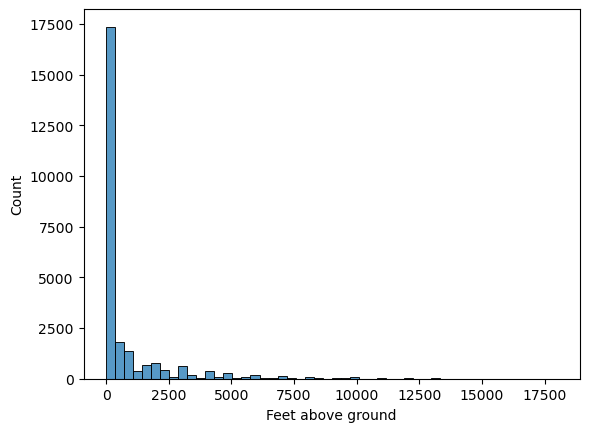

In [27]:
sns.histplot(Data['Feet above ground'], bins= 50)

In [28]:
### Fill Feet above ground Feature NAN Values With Mean
Data['Feet above ground'].fillna(Data['Feet above ground'].mean(), inplace= True)

In [29]:
Data[numarical_features].isnull().sum()

Wildlife: Number Struck Actual             0
FlightDate                                 0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Cost: Total $                              0
Feet above ground                          0
Number of people injured                   0
dtype: int64

In [30]:
Data.shape

(25419, 25)

In [31]:
Data[categorical_features].isnull().sum()

Aircraft: Type                           0
Airport: Name                            0
Altitude bin                             0
Aircraft: Make/Model                     0
Wildlife: Number struck                  0
Effect: Impact to flight                 0
Effect: Indicated Damage                 0
Aircraft: Number of engines?           234
Aircraft: Airline/Operator               0
Origin State                           449
When: Phase of flight                    0
Conditions: Precipitation                0
Remarks                               4758
Wildlife: Size                           0
Conditions: Sky                          0
Wildlife: Species                        0
Pilot warned of birds or wildlife?       0
Is Aircraft Large?                       0
dtype: int64

In [32]:
### Fill Categorical Features NAN Values With New Category "Missing"
Data[categorical_features].fillna('Missing', inplace= True)

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/3554130643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[categorical_features].fillna('Missing', inplace= True)


In [33]:
Data[categorical_features].head(3)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Effect: Impact to flight,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,Engine Shut Down,Caused damage,2,US AIRWAYS*,New York,Climb,None,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,None,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,No
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,None,No damage,2,BUSINESS,Louisiana,Approach,None,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,No


In [34]:
### Effect: Indicated Damage Total Value Count
Data['Effect: Indicated Damage'].value_counts()

No damage        22965
Caused damage     2454
Name: Effect: Indicated Damage, dtype: int64

In [35]:
#### Change Effect: Indicated Damage Feature Category with 0,1 For Some Reason

Data['Effect: Indicated Damage'][Data['Effect: Indicated Damage'] == 'No damage'] = 0
Data['Effect: Indicated Damage'][Data['Effect: Indicated Damage'] == 'Caused damage'] = 1

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/1261161704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Effect: Indicated Damage'][Data['Effect: Indicated Damage'] == 'No damage'] = 0
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/1261161704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Effect: Indicated Damage'][Data['Effect: Indicated Damage'] == 'Caused damage'] = 1


In [36]:
#### Chang Effect: Indicated Damage Feature Datatype into INT
Data['Effect: Indicated Damage'] = Data['Effect: Indicated Damage'].astype(int)

In [37]:
### Seee All The Features datatypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25419 entries, 0 to 25557
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Aircraft: Type                           25419 non-null  object        
 1   Airport: Name                            25419 non-null  object        
 2   Altitude bin                             25419 non-null  object        
 3   Aircraft: Make/Model                     25419 non-null  object        
 4   Wildlife: Number struck                  25419 non-null  object        
 5   Wildlife: Number Struck Actual           25419 non-null  int64         
 6   Effect: Impact to flight                 25419 non-null  object        
 7   FlightDate                               25419 non-null  datetime64[ns]
 8   Effect: Indicated Damage                 25419 non-null  int64         
 9   Aircraft: Number of engines?           

In [38]:
Data.isnull().sum()

Aircraft: Type                                0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                234
Aircraft: Airline/Operator                    0
Origin State                                449
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4758
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                             0
Pilot warned of birds or wildlife?      

In [39]:
Data['Aircraft: Number of engines?'].fillna('')

0        2
1        2
2        2
3        2
4        2
        ..
25552    2
25553    2
25554    2
25556    2
25557    2
Name: Aircraft: Number of engines?, Length: 25419, dtype: object

In [40]:
Data.head()

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,1,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,0,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,0,2,ALASKA AIRLINES,Washington,Climb,None,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,0,2,COMAIR AIRLINES,Virginia,Approach,None,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [41]:
Data['Aircraft: Number of engines?'].value_counts()

2    22993
1     1239
3      564
4      388
C        1
Name: Aircraft: Number of engines?, dtype: int64

In [42]:
Data[Data['Aircraft: Number of engines?'] == 'C']

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
6664,Airplane,MORGANTOWN MUNICIPAL ARPT,> 1000 ft,RKWLTRBO 690,1,1,None,2001-11-05,0,C,BUSINESS,West Virginia,Descent,None,False,False,PILOT ADZ NO DMG. INFO RELAYED TO CKB THRU MGW...,Medium,No Cloud,Unknown bird - medium,N,0,4000.0,0,No


In [43]:
Data.drop(6664, inplace= True)

In [44]:
Data[Data['Aircraft: Number of engines?'] == 'C']

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?


In [45]:
Data['Aircraft: Number of engines?'].value_counts()

2    22993
1     1239
3      564
4      388
Name: Aircraft: Number of engines?, dtype: int64

In [46]:
mod = Data['Aircraft: Number of engines?'].mode()[0]
Data['Aircraft: Number of engines?'].fillna(mod, inplace= True)

In [47]:
Data['Aircraft: Number of engines?'].dtype

dtype('int64')

In [48]:
Data.isnull().sum()

Aircraft: Type                                0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                  0
Aircraft: Airline/Operator                    0
Origin State                                449
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4758
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                             0
Pilot warned of birds or wildlife?      

In [49]:
### Replave The Origin State NAN VAlues With most Frequent Values
len(Data['Origin State'].unique())
freq = Data['Origin State'].value_counts().sort_values(ascending= False)[0]
Data['Origin State'].fillna(freq, inplace= True)

In [50]:
### Let's Replace Remarks NAN Values With New Label 'Missing' 
Data['Remarks'].fillna('Missing', inplace= True)

In [51]:
Data.isnull().sum()

Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above

In [52]:
Data.head(3)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,1,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,0,2,BUSINESS,Louisiana,Approach,None,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No


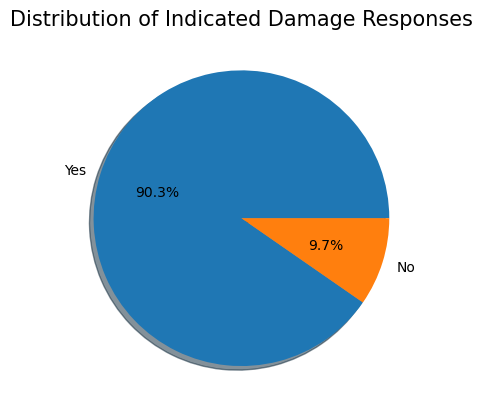

In [53]:
plt.pie(Data['Effect: Indicated Damage'].value_counts().values, labels= ['Yes','No'],autopct= "%0.1f%%", shadow= True, )

plt.title("Distribution of Indicated Damage Responses", fontsize = 15)

plt.show()

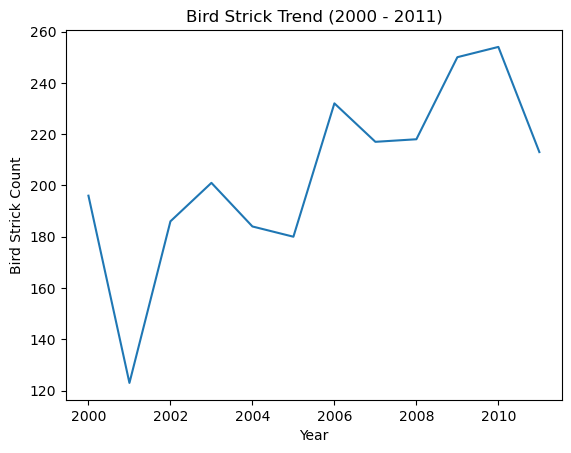

In [54]:
#### Identify The Bird Strick Trend Using Line plot

Data['Year'] = Data['FlightDate'].dt.year

Data.groupby('Year')['Effect: Indicated Damage'].sum().plot.line()

plt.title('Bird Strick Trend (2000 - 2011)')
plt.xlabel('Year')
plt.ylabel('Bird Strick Count')
plt.show()


##### Observation

1. Very Low Bird Strick Count in 2001
2. Very Heigh Bird Strick Count in 2010
3. in 2011 Bird Strick Count are Heuge drop to compare with 2010

In [55]:
Data['Year'].unique()

array([2000, 2001, 2002, 2003, 2006, 2004, 2005, 2007, 2008, 2009, 2010,
       2011])

In [56]:
Data.groupby(['Year','Altitude bin'])[['Effect: Indicated Damage']].sum()

Effect: Indicated Damage
Year Altitude bin                          
2000 < 1000 ft                          122
     > 1000 ft                           74
2001 < 1000 ft                           90
     > 1000 ft                           33
2002 < 1000 ft                          124
     > 1000 ft                           62
2003 < 1000 ft                          141
     > 1000 ft                           60
2004 < 1000 ft                          137
     > 1000 ft                           47
2005 < 1000 ft                          128
     > 1000 ft                           52
2006 < 1000 ft                          160
     > 1000 ft                           72
2007 < 1000 ft                          156
     > 1000 ft                           61
2008 < 1000 ft                          150
     > 1000 ft                           68
2009 < 1000 ft                          179
     > 1000 ft                           71
2010 < 1000 ft                          174
     > 1000 ft                           80
2011 < 1000 ft                          141
     > 1000 ft                           72

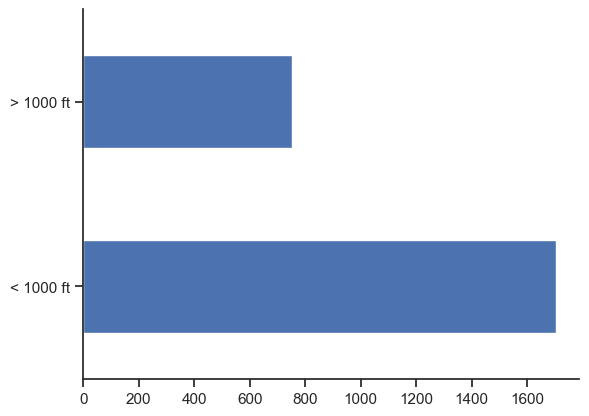

In [78]:
Data.groupby('Altitude bin')['Effect: Indicated Damage'].sum().plot.barh()
plt.ylabel('')
sns.despine()

## Observation 

Most Of The Damage Indicated in below 1000 Feet

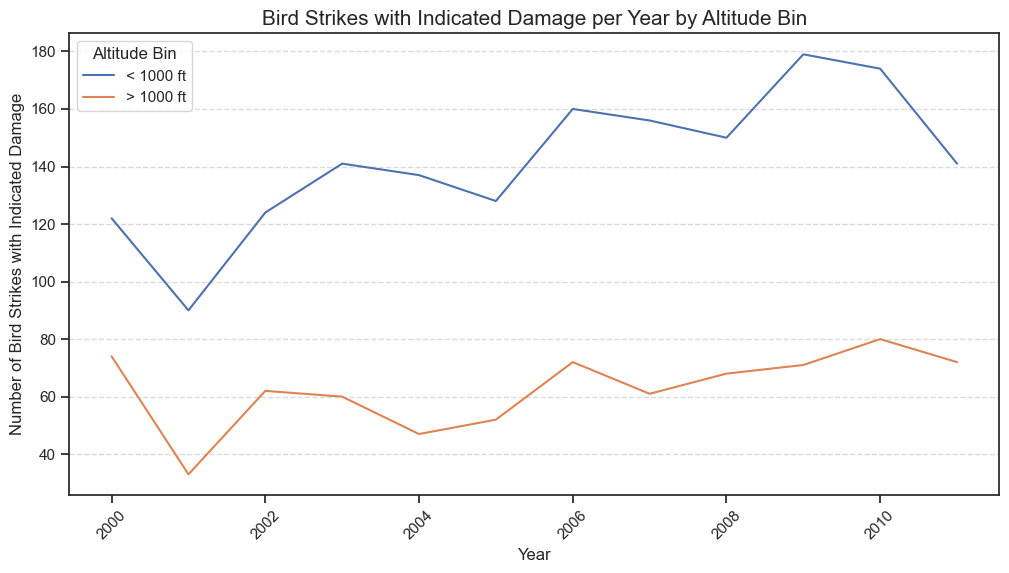

In [80]:
# Convert 'Effect: Indicated Damage' to integer (True = 1, False = 0)
Data['Effect: Indicated Damage'] = Data['Effect: Indicated Damage'].astype(int)

# Group by 'Year' and 'Altitude bin' and sum the 'Effect: Indicated Damage'
grouped_data = Data.groupby(['Year', 'Altitude bin'], as_index=False)['Effect: Indicated Damage'].sum()

# Plot using Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='Effect: Indicated Damage', hue='Altitude bin')

# Customize the plot
plt.title('Bird Strikes with Indicated Damage per Year by Altitude Bin',fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes with Indicated Damage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Altitude Bin', loc='upper left')

# Display the plot
plt.show()

##### Observation 

Every Year Damage indicated in below 1000 Feet



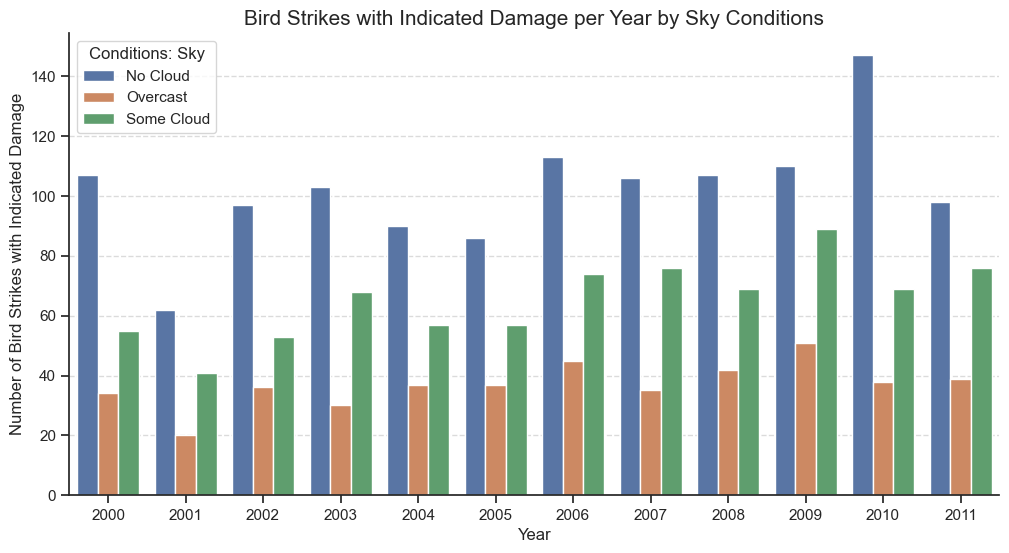

In [81]:
# Convert 'Effect: Indicated Damage' to integer (True = 1, False = 0)
#Data['Effect: Indicated Damage'] = Data['Effect: Indicated Damage'].astype(int)

# Group by 'Year' and 'Altitude bin', and sum the 'Effect: Indicated Damage'
grouped_data = Data.groupby(['Year', 'Conditions: Sky'], as_index=False)['Effect: Indicated Damage'].sum()

# Plot using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Year', y='Effect: Indicated Damage', hue='Conditions: Sky')

# Customize the plot
plt.title('Bird Strikes with Indicated Damage per Year by Sky Conditions', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes with Indicated Damage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Display the plot
plt.show()

#### Observation 

1. Every Year Most of The Damage Indicated in (No Cloud Sky Condition)
2. Every Year least of The Damage Indicated in (Overcast Sky Condition)

Total Damage Indicaded ------------ (No Cloud > Some Cloud > Overcast) Sky Condition



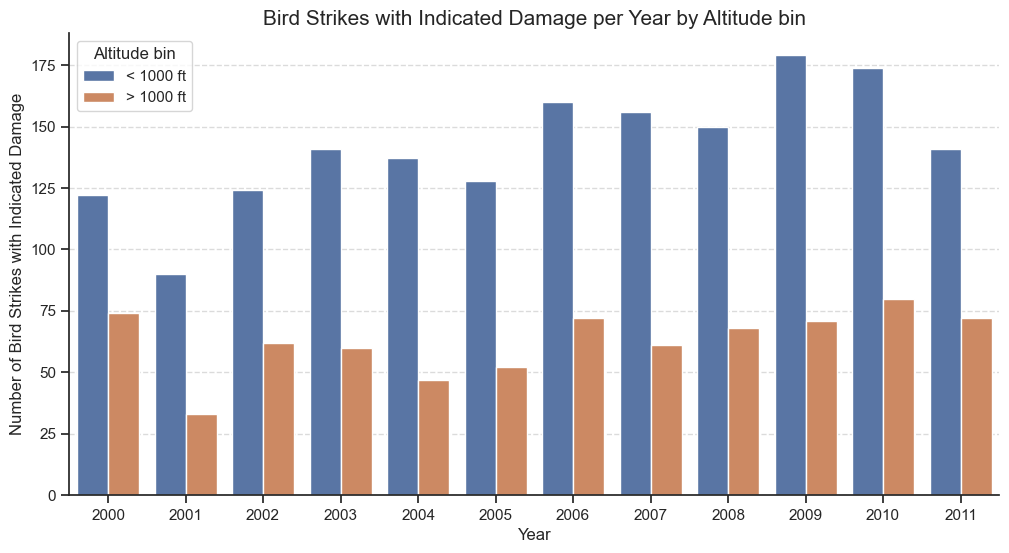

In [82]:
# Convert 'Effect: Indicated Damage' to integer (True = 1, False = 0)
#Data['Effect: Indicated Damage'] = Data['Effect: Indicated Damage'].astype(int)

# Group by 'Year' and 'Altitude bin', and sum the 'Effect: Indicated Damage'
grouped_data = Data.groupby(['Year', 'Altitude bin'], as_index=False)['Effect: Indicated Damage'].sum()

# Plot using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Year', y='Effect: Indicated Damage', hue='Altitude bin')

# Customize the plot
plt.title('Bird Strikes with Indicated Damage per Year by Altitude bin',fontsize = 15 )
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes with Indicated Damage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Display the plot
plt.show()

In [60]:
Data.columns

Index(['Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [61]:
Data['Wildlife: Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

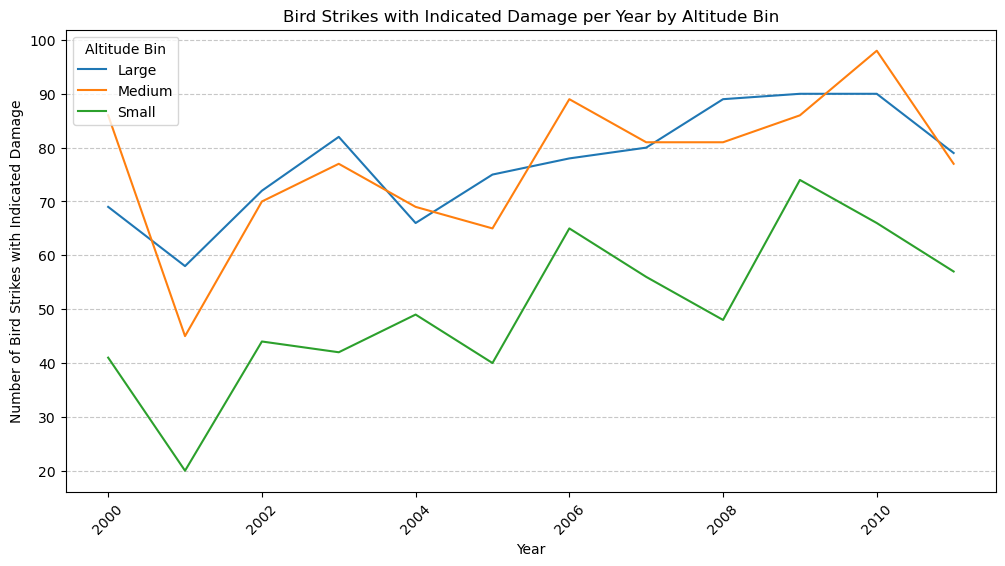

In [62]:
# Convert 'Effect: Indicated Damage' to integer (True = 1, False = 0)
Data['Effect: Indicated Damage'] = Data['Effect: Indicated Damage'].astype(int)

# Group by 'Year' and 'Altitude bin' and sum the 'Effect: Indicated Damage'
grouped_data = Data.groupby(['Year', 'Wildlife: Size'], as_index=False)['Effect: Indicated Damage'].sum()

# Plot using Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='Effect: Indicated Damage', hue='Wildlife: Size')

# Customize the plot
plt.title('Bird Strikes with Indicated Damage per Year by Altitude Bin')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes with Indicated Damage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Altitude Bin', loc='upper left')

# Display the plot
plt.show()

# Bird Strikes with Indicated Damage per Year by Altitude Bin

This line plot illustrates the **number of bird strikes causing indicated damage** over the years, segmented by **altitude bin** (Large, Medium, and Small). The goal is to analyze trends and see how altitude affects the frequency of bird strikes that cause damage over time.

- **X-axis:** Year  
- **Y-axis:** Number of Bird Strikes with Indicated Damage  
- **Legend:** Represents altitude bin categories: Large, Medium, and Small  
- **Key Observations:**  
  1. Strikes at **large and medium altitudes** remain consistently higher across the years, with some fluctuation.  
  2. **Small altitude strikes** exhibit a steady increase with a few dips, peaking around 2008.  
  3. The trends suggest that mitigation strategies may need to account more for larger altitude bins.

---

In [63]:
Data.head(2)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,1,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/2221066919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Species_grouped_data, y='Wildlife: Species', x='Effect: Indicated Damage', palette= 'dark:b')


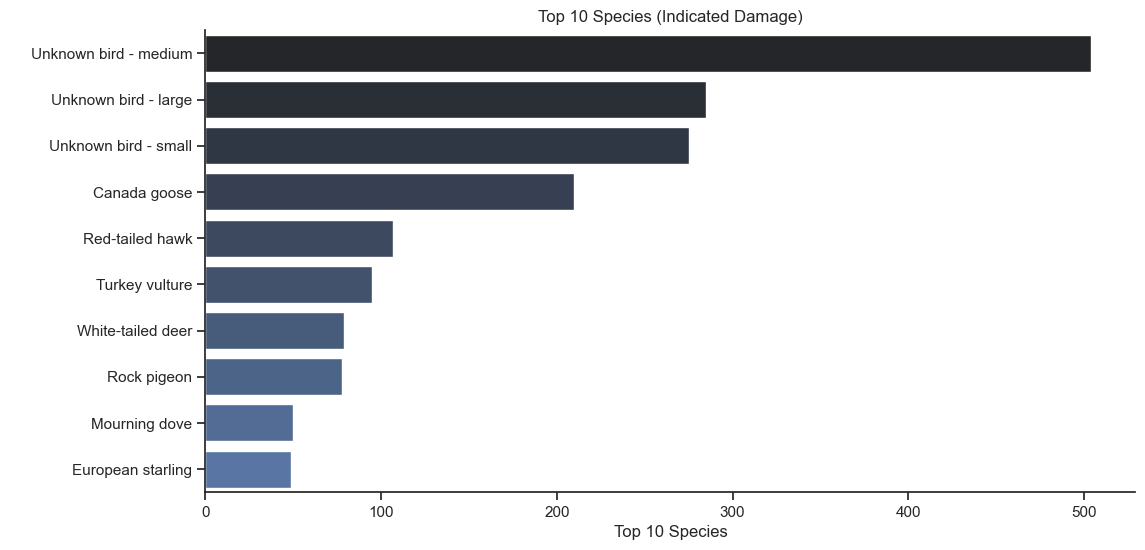

In [64]:
Species_grouped_data = Data.groupby(['Wildlife: Species'])['Effect: Indicated Damage'].sum().sort_values(ascending=False).reset_index().head(10)

# Plot using Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.set_theme(style= 'ticks')
sns.barplot(data=Species_grouped_data, y='Wildlife: Species', x='Effect: Indicated Damage', palette= 'dark:b')
sns.despine()

# Customize the plot
plt.title('Top 10 Species (Indicated Damage)')
plt.xlabel('Top 10 Species')
plt.ylabel(' ')
plt.xticks(rotation=0)
#plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the plot
plt.show()


# Wildlife Strike Analysis: Top 10 Species by Indicated Damage

This visualization presents the **Top 10 wildlife species** involved in strikes, ranked by **indicated damage**. The plot highlights the extent to which different species contribute to total damage, with larger birds like unknown medium and large birds causing the most significant damage. The goal is to provide insights into patterns that could help mitigate risks related to wildlife interference.

- **X-axis:** Indicated damage (frequency/count)
- **Y-axis:** Wildlife species involved
- **Key Observations:**  
  1. Medium and large birds account for the highest levels of indicated damage.  
  2. Species like Canada geese and Red-tailed hawks also pose significant risks.  
  3. Smaller birds (e.g., European starlings) have relatively lower but still notable impacts.


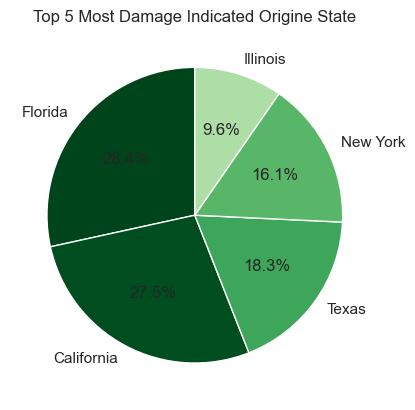

In [65]:
### Top 5 Origine State with Most Damage Indicated

top5_originestate = Data.groupby(['Origin State'])['Effect: Indicated Damage'].sum().sort_values(ascending=False).head(5)

# Create a colormap (e.g., 'Blues') and sort the colors by size (descending)
cmap = plt.get_cmap('Greens')

# Normalize sizes to get corresponding shade intensities (higher = darker)
norm_sizes = np.array(top5_originestate.values) / max(top5_originestate.values)  # Scale values between 0 and 1
colors = cmap(norm_sizes)  # Get shades based on normalized sizes

plt.pie(top5_originestate.values, labels= top5_originestate.index, autopct= '%0.1f%%', colors= colors, startangle=90)

plt.title('Top 5 Most Damage Indicated Origine State')

plt.show()



# Top 5 States with the Most Indicated Damage from Bird Strikes

This pie chart showcases the **Top 5 U.S. states** with the highest proportion of indicated damage from bird strikes. The chart provides insight into which states experience the most severe impacts, highlighting the regional differences in wildlife strike occurrences.

- **States Included:**  
  - **Florida:** 28.4%  
  - **California:** 27.5%  
  - **Texas:** 18.3%  
  - **New York:** 16.1%  
  - **Illinois:** 9.6%

- **Key Observations:**  
  1. **Florida** and **California** contribute nearly equal shares, together making up over 55% of the total damage.  
  2. **Texas** accounts for a significant portion, with 18.3% of the indicated damage.  
  3. **Illinois** has the smallest share among the top five, with 9.6%.

---

## Identify Correlation Between Wildlife Strikes and Total Damage

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/65230405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_plot, x = 'Effect: Indicated Damage', y = 'Wildlife: Number struck', palette= 'dark:b')


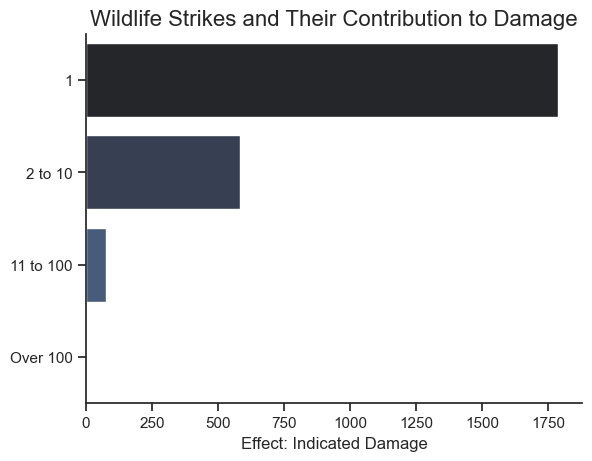

In [66]:
df_plot = Data.groupby('Wildlife: Number struck')['Effect: Indicated Damage'].sum().sort_values(ascending=False).reset_index()

sns.set_theme(style='ticks')

sns.barplot(data= df_plot, x = 'Effect: Indicated Damage', y = 'Wildlife: Number struck', palette= 'dark:b')
sns.despine()
plt.ylabel('')
plt.title("Wildlife Strikes and Their Contribution to Damage", fontsize=16 )

plt.show()


In [67]:
Data.head(2)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,1,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001


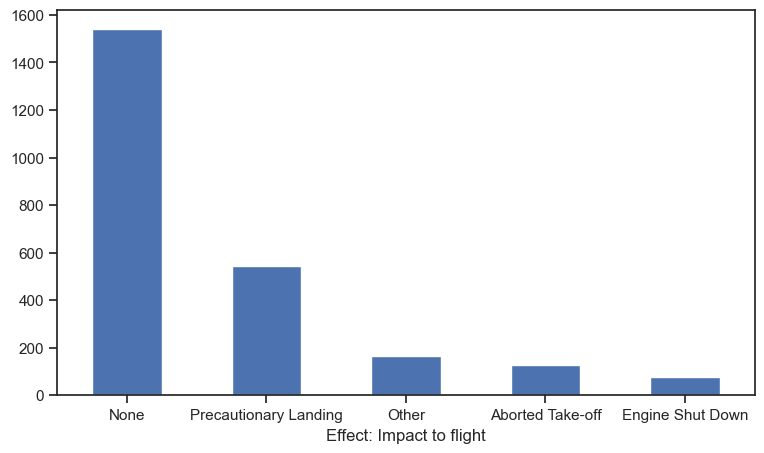

In [68]:
plt.figure(figsize=(9,5))

Data.groupby('Effect: Impact to flight')['Effect: Indicated Damage'].sum().sort_values(ascending= False).plot.bar()
plt.xticks(rotation=0)
plt.show()

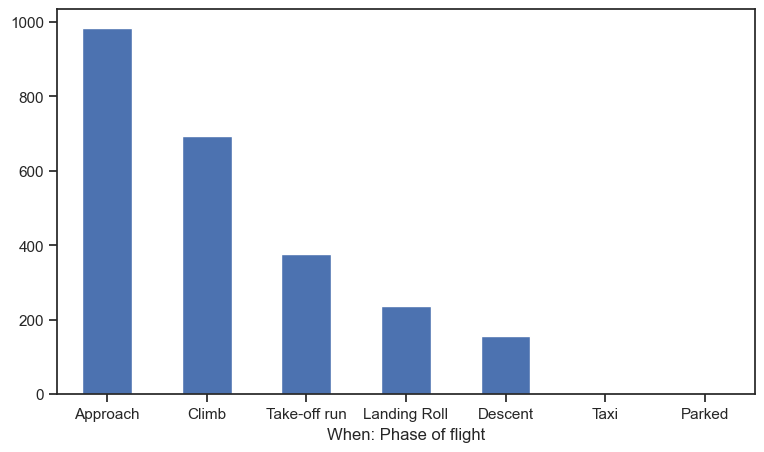

In [69]:
plt.figure(figsize=(9,5))

Data.groupby('When: Phase of flight')['Effect: Indicated Damage'].sum().sort_values(ascending= False).plot.bar()
plt.xticks(rotation=0)
plt.show()

In [70]:
Data.head(2)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,1,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/603114071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_plot, x = 'Effect: Indicated Damage', y = 'Is Aircraft Large?', palette='dark:r_r', width= .5)


Text(0, 0.5, '')

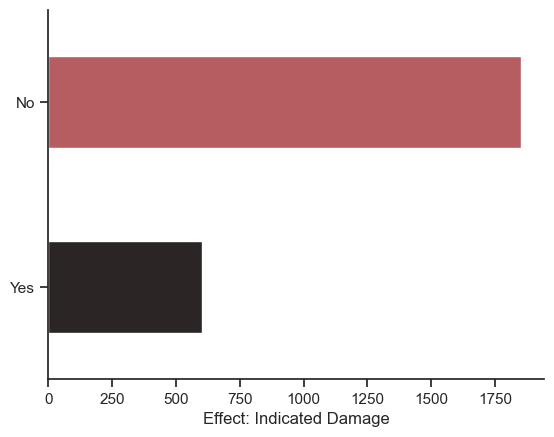

In [71]:
df_plot = Data.groupby('Is Aircraft Large?')['Effect: Indicated Damage'].sum().sort_values(ascending= False).reset_index()

sns.barplot(data= df_plot, x = 'Effect: Indicated Damage', y = 'Is Aircraft Large?', palette='dark:r_r', width= .5)
sns.despine()
plt.ylabel('')

In [72]:
Data[ (Data['Number of people injured'] > 0)]


,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
233,Airplane,TROY MUNICIPAL ARPT,< 1000 ft,LEARJET-60,2 to 10,3,Other,2001-01-14,1,2,BUSINESS,Alabama,Landing Roll,None,False,False,HIT 2 DEER AND RAN OFF RWY. THRUST REVERSERS W...,Large,No Cloud,White-tailed deer,N,12397751,0.0,2,No,2001
781,Airplane,ROGUE VALLEY INTL,< 1000 ft,DHC8 DASH 8,2 to 10,4,Precautionary Landing,2003-01-08,1,2,HORIZON AIR,Oregon,Approach,None,True,True,7-8 BIRDS SUDDENLY APPEARED I FRONT OF A/C. SE...,Medium,No Cloud,Lesser scaup,N,123476,1000.0,1,No,2003
2638,Airplane,FORT LAUDERDALE EXECUTIVE ARPT,> 1000 ft,CIRRUS SR 20/22,2 to 10,9,Precautionary Landing,2008-09-26,1,1,BUSINESS,Florida,Climb,None,False,True,"ID BY SMITHSONIAN VIA PHOTO, FAA2 713. PROP DE...",Medium,Overcast,Anhinga,N,0,2500.0,1,No,2008
2781,Airplane,FORT LAUDERDALE/HOLLYWOOD INTL,< 1000 ft,C-402,2 to 10,7,Precautionary Landing,2009-02-16,1,2,BUSINESS,Florida,Climb,None,True,False,PILOT REPTD AT 600 FT BEING STRUCK BY A FLOCK ...,Large,Some Cloud,Black vulture,Y,0,600.0,1,No,2009
4426,Airplane,ST LOUIS DOWNTOWN,< 1000 ft,LEARJET-24,11 to 100,33,Engine Shut Down,2003-11-12,1,2,BUSINESS,Illinois,Climb,None,False,False,A/C INGESTED LITTLE BLACK BIRDS IN BOTH ENGS C...,Small,No Cloud,Unknown bird - small,N,926070,500.0,6,No,2003
5829,Airplane,SAN ANTONIO INTL,< 1000 ft,BE-95,1,1,None,2001-02-25,1,2,PRIVATELY OWNED,Texas,Approach,None,False,False,"AFTER BEING CLEARED TO LAND, PILOT SAW A BIRD ...",Large,No Cloud,Black vulture,N,26553,150.0,1,No,2001
7061,Airplane,DAYTONA BEACH INTL,> 1000 ft,C-172,1,1,Precautionary Landing,2002-05-09,1,1,BUSINESS,Florida,Approach,None,False,False,BIRD SHATTERED L SIDE OF WINDHSLD. STUDENT REC...,Large,No Cloud,Turkey vulture,Y,570,2000.0,1,No,2002
7196,Airplane,ORLANDO SANFORD INTL AIRPORT,< 1000 ft,C-172,1,1,Precautionary Landing,2002-06-06,1,1,BUSINESS,Florida,Descent,None,False,False,BIRD CAME THRU WINDSHLD AND INJURED STUDENT PI...,Large,Some Cloud,Turkey vulture,N,1382,1000.0,2,No,2002
8474,Airplane,MARTIN STATE ARPT,> 1000 ft,PA-60 601,1,1,Precautionary Landing,2003-06-10,1,2,PRIVATELY OWNED,Maryland,Climb,None,True,False,CUTS AND BRUISES TO CO-PILOT'S ARMS AND CHEST ...,Large,No Cloud,Black vulture,N,9878,1500.0,1,No,2003
12279,Airplane,EXECUTIVE ARPT,> 1000 ft,C-210 CENTUR,1,1,Precautionary Landing,2006-01-21,1,1,FLIGHT EXPRESS,Florida,Approach,None,False,False,BIRD HIT RT OF CENTERLINE WITH ABOUT 40% OF WI...,Large,No Cloud,Black vulture,N,0,2000.0,1,No,2006


In [73]:
Data['Number of people injured'].sum()

21

In [93]:
#### Reaname Pilot warned of birds or wildlife? Feature Category into Yes, No
Data['Pilot warned of birds or wildlife?'][Data['Pilot warned of birds or wildlife?'] == 'Y'] = 'Yes'
Data['Pilot warned of birds or wildlife?'][Data['Pilot warned of birds or wildlife?'] == 'N'] = 'No'

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/1762408458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Pilot warned of birds or wildlife?'][Data['Pilot warned of birds or wildlife?'] == 'Y'] = 'Yes'
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_31823/1762408458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Pilot warned of birds or wildlife?'][Data['Pilot warned of birds or wildlife?'] == 'N'] = 'No'


<Axes: ylabel='Pilot warned of birds or wildlife?'>

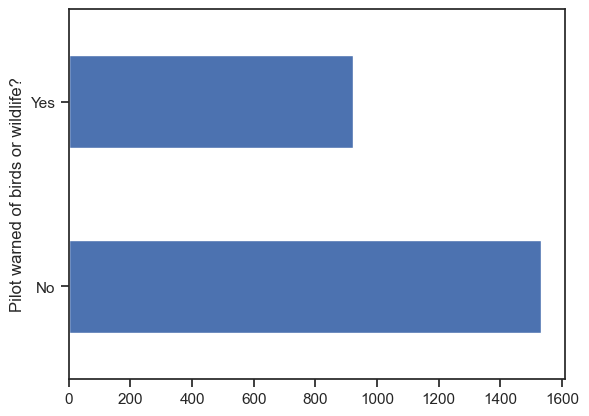

In [94]:
### Before Damage Indicated How Many Times Pilot warned of birds or wildlife
Data.groupby('Pilot warned of birds or wildlife?')['Effect: Indicated Damage'].sum().plot.barh()

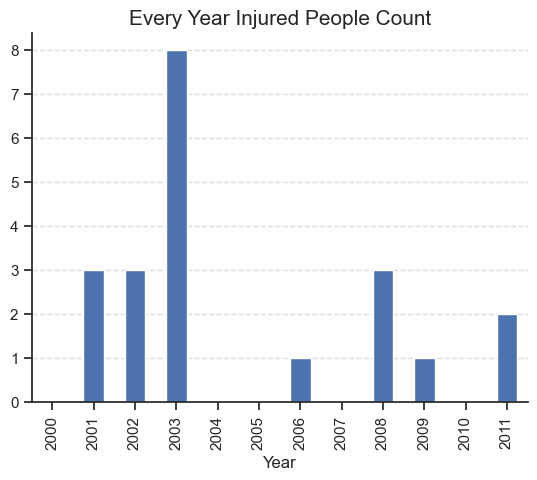

In [99]:
#### Fine How Many People injured in Each Year
Data.groupby('Year')['Number of people injured'].sum().plot.bar()
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation=0)
plt.title('Every Year Injured People Count', fontsize = 15)
sns.despine()
plt.show()